<a href="https://colab.research.google.com/github/eric-pierce/Supervised-Learning-Methods/blob/main/epierce_assignment_1_Rmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: EDA: Ames Iowa Housing Study
## MSDS-410 Summer 2020 - Eric Pierce
## Background  
A website provider needs to provide accurate labels to images submitted by end users, and is leveraging a dataset of cat and dog images to identify the best approach to accomplish this.
## Objective
In order to apply these labels, the manager is looking to employ the most accurate modeling approach possible, and prioritizes accuracy over expense. The manager is also looking to understand what types of machine learning models are most effective, and what types of input images are best suited for the model.

# Setup and Data Import

Install required Packages

In [ ]:
devtools::install_github('IRkernel/repr') 
install.packages("ggplot2")
install.packages("GGally")
install.packages("corrplot")

Skipping install of 'repr' from a github remote, the SHA1 (4507f9f9) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Load data

In [ ]:
mydata <- read.csv(file="https://raw.githubusercontent.com/eric-pierce/MSDS410/master/ames_housing_data.csv",head=TRUE,sep=",")

First look at the data

In [ ]:
str(mydata)

'data.frame':	2930 obs. of  82 variables:
 $ SID          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ PID          : int  526301100 526350040 526351010 526353030 527105010 527105030 527127150 527145080 527146030 527162130 ...
 $ SubClass     : int  20 20 20 20 60 60 120 120 120 60 ...
 $ Zoning       : Factor w/ 7 levels "A (agr)","C (all)",..: 6 5 6 6 6 6 6 6 6 6 ...
 $ LotFrontage  : int  141 80 81 93 74 78 41 43 39 60 ...
 $ LotArea      : int  31770 11622 14267 11160 13830 9978 4920 5005 5389 7500 ...
 $ Street       : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley        : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 1 4 1 4 1 1 4 1 1 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 2 4 4 ...
 $ Utilities    : Factor w/ 3 levels "AllPub","NoSeWa",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 1 5 1 1 5 5 5 5 5 5 ...
 $ 

Head of the datafile

In [ ]:
head(mydata)

,SID,PID,SubClass,Zoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>
1,1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,⋯,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,⋯,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,195500


Header of the datafile

In [ ]:
names(mydata)

[1] "SID"           "PID"           "SubClass"      "Zoning"       
 [5] "LotFrontage"   "LotArea"       "Street"        "Alley"        
 [9] "LotShape"      "LandContour"   "Utilities"     "LotConfig"    
[13] "LandSlope"     "Neighborhood"  "Condition1"    "Condition2"   
[17] "BldgType"      "HouseStyle"    "OverallQual"   "OverallCond"  
[21] "YearBuilt"     "YearRemodel"   "RoofStyle"     "RoofMat"      
[25] "Exterior1"     "Exterior2"     "MasVnrType"    "MasVnrArea"   
[29] "ExterQual"     "ExterCond"     "Foundation"    "BsmtQual"     
[33] "BsmtCond"      "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"   
[37] "BsmtFinType2"  "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"  
[41] "Heating"       "HeatingQC"     "CentralAir"    "Electrical"   
[45] "FirstFlrSF"    "SecondFlrSF"   "LowQualFinSF"  "GrLivArea"    
[49] "BsmtFullBath"  "BsmtHalfBath"  "FullBath"      "HalfBath"     
[53] "BedroomAbvGr"  "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd" 
[57] "Functional"    "Fireplaces"    "FireplaceQu"   "GarageType"   
[61] "GarageYrBlt"   "GarageFinish"  "GarageCars"    "GarageArea"   
[65] "GarageQual"    "GarageCond"    "PavedDrive"    "WoodDeckSF"   
[69] "OpenPorchSF"   "EnclosedPorch" "ThreeSsnPorch" "ScreenPorch"  
[73] "PoolArea"      "PoolQC"        "Fence"         "MiscFeature"  
[77] "MiscVal"       "MoSold"        "YrSold"        "SaleType"     
[81] "SaleCondition" "SalePrice"

Create new features/columns

In [ ]:
mydata$TotalFloorSF <- mydata$FirstFlrSF + mydata$SecondFlrSF
mydata$HouseAge <- mydata$YrSold - mydata$YearBuilt
mydata$QualityIndex <- mydata$OverallQual * mydata$OverallCond
mydata$logSalePrice <- log(mydata$SalePrice)
mydata$price_sqft <- mydata$SalePrice/mydata$TotalFloorSF

#Summary of price per square foot
summary(mydata$price_sqft)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.37  100.57  120.43  121.60  140.01  276.25 

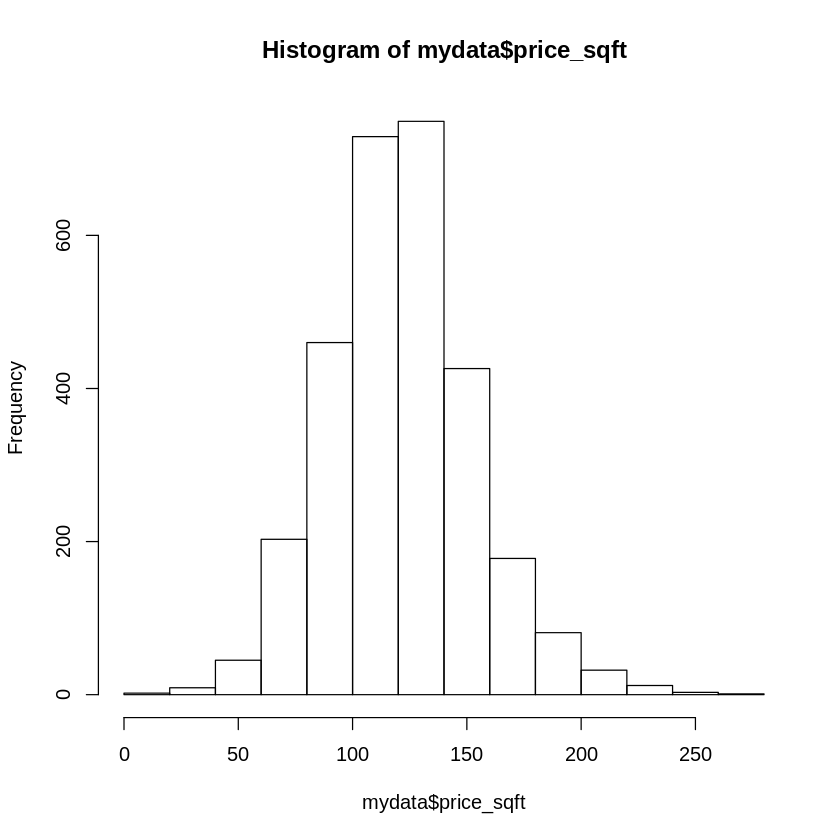

In [ ]:
hist(mydata$price_sqft)

In [ ]:
subdat <- subset(mydata, select=c("TotalFloorSF","HouseAge","QualityIndex",
                                  "price_sqft", "SalePrice","LotArea",
                                  "BsmtFinSF1","Neighborhood","HouseStyle",
                                  "LotShape","OverallQual","logSalePrice",
                                  "TotalBsmtSF","HouseStyle"))
subdatnum <- subset(mydata, select=c("TotalFloorSF","HouseAge","QualityIndex",
                                     "SalePrice","LotArea","OverallQual","logSalePrice"))
str(subdat)

'data.frame':	2930 obs. of  14 variables:
 $ TotalFloorSF: int  1656 896 1329 2110 1629 1604 1338 1280 1616 1804 ...
 $ HouseAge    : int  50 49 52 42 13 12 9 18 15 11 ...
 $ QualityIndex: int  30 30 36 35 25 36 40 40 40 35 ...
 $ price_sqft  : num  130 117 129 116 117 ...
 $ SalePrice   : int  215000 105000 172000 244000 189900 195500 213500 191500 236500 189000 ...
 $ LotArea     : int  31770 11622 14267 11160 13830 9978 4920 5005 5389 7500 ...
 $ BsmtFinSF1  : int  639 468 923 1065 791 602 616 263 1180 0 ...
 $ Neighborhood: Factor w/ 28 levels "Blmngtn","Blueste",..: 16 16 16 16 9 9 25 25 25 9 ...
 $ HouseStyle  : Factor w/ 8 levels "1.5Fin","1.5Unf",..: 3 3 3 3 6 6 3 3 3 6 ...
 $ LotShape    : Factor w/ 4 levels "IR1","IR2","IR3",..: 1 4 1 4 1 1 4 1 1 4 ...
 $ OverallQual : int  6 5 6 7 5 6 8 8 8 7 ...
 $ logSalePrice: num  12.3 11.6 12.1 12.4 12.2 ...
 $ TotalBsmtSF : int  1080 882 1329 2110 928 926 1338 1280 1595 994 ...
 $ HouseStyle.1: Factor w/ 8 levels "1.5Fin","1.5Unf",..: 

#Univariate EDA

Loading required package: ggplot2



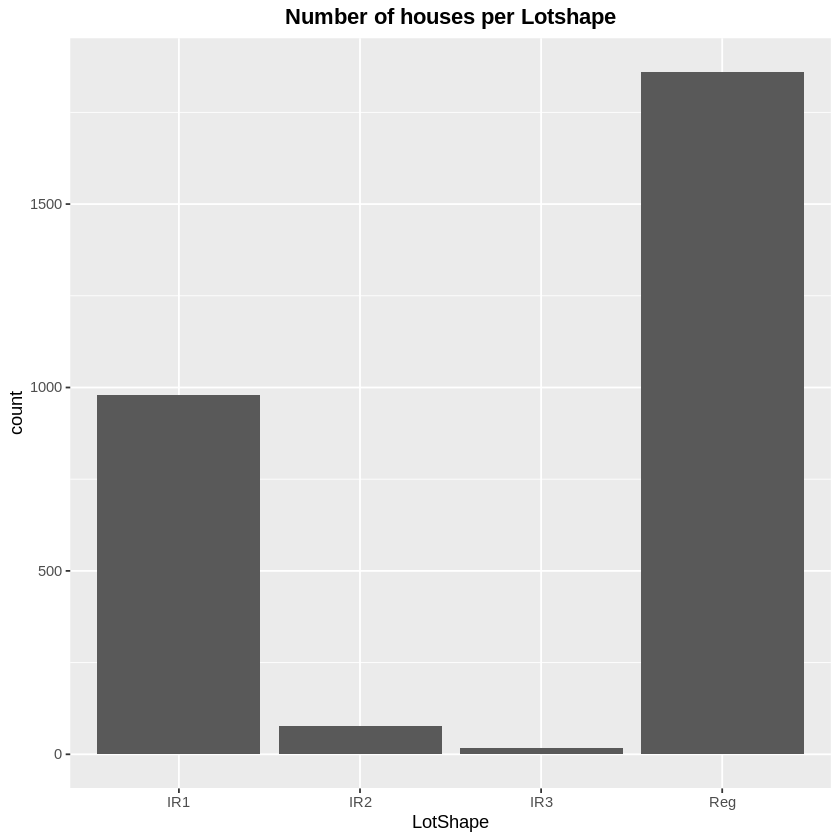

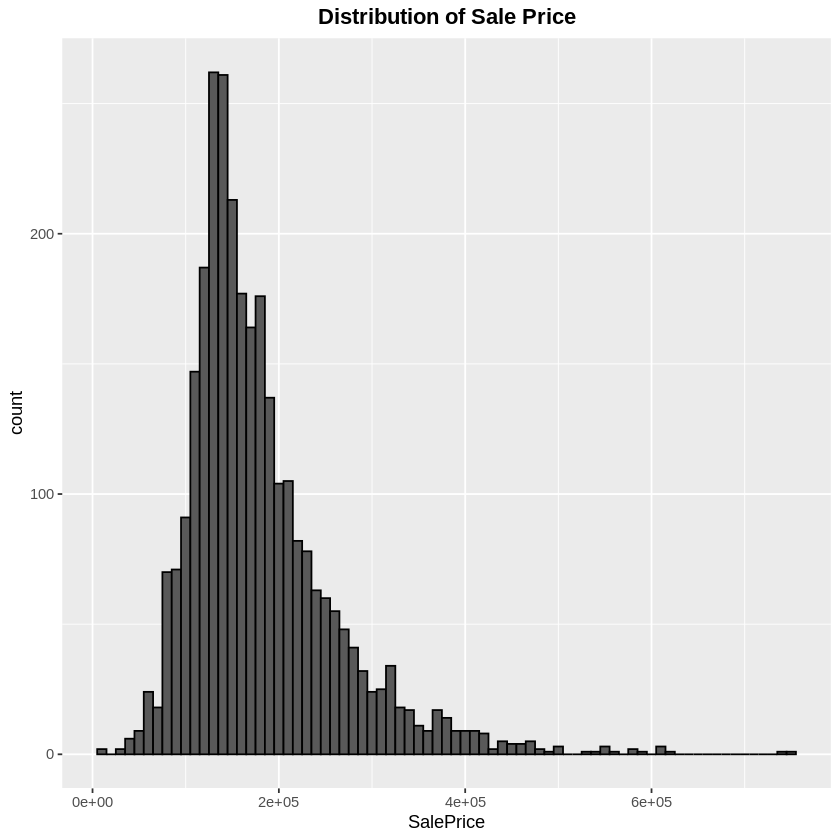

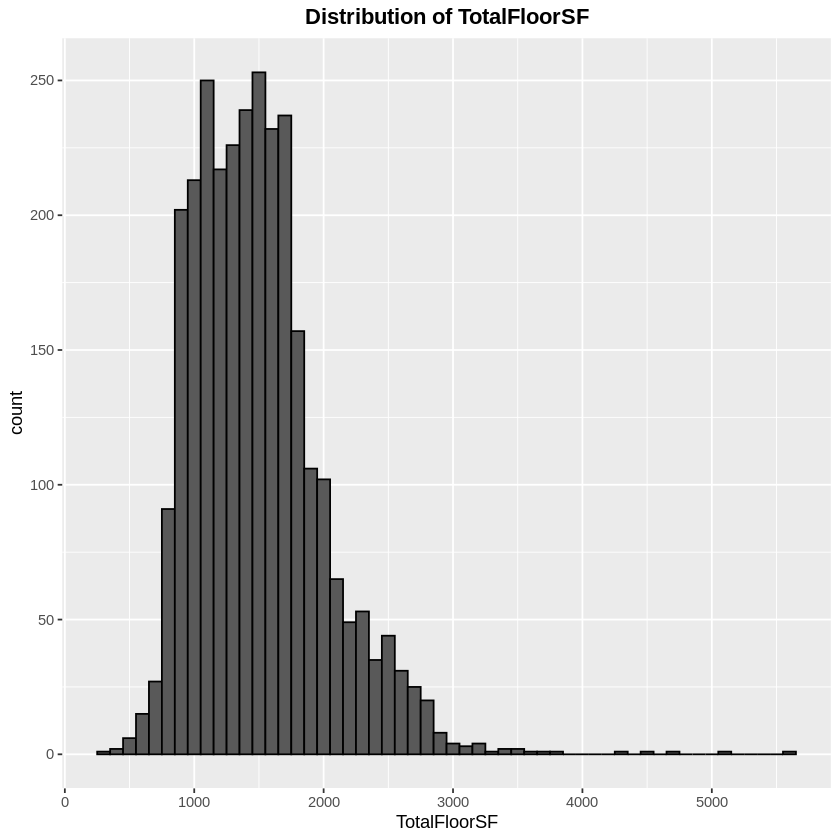

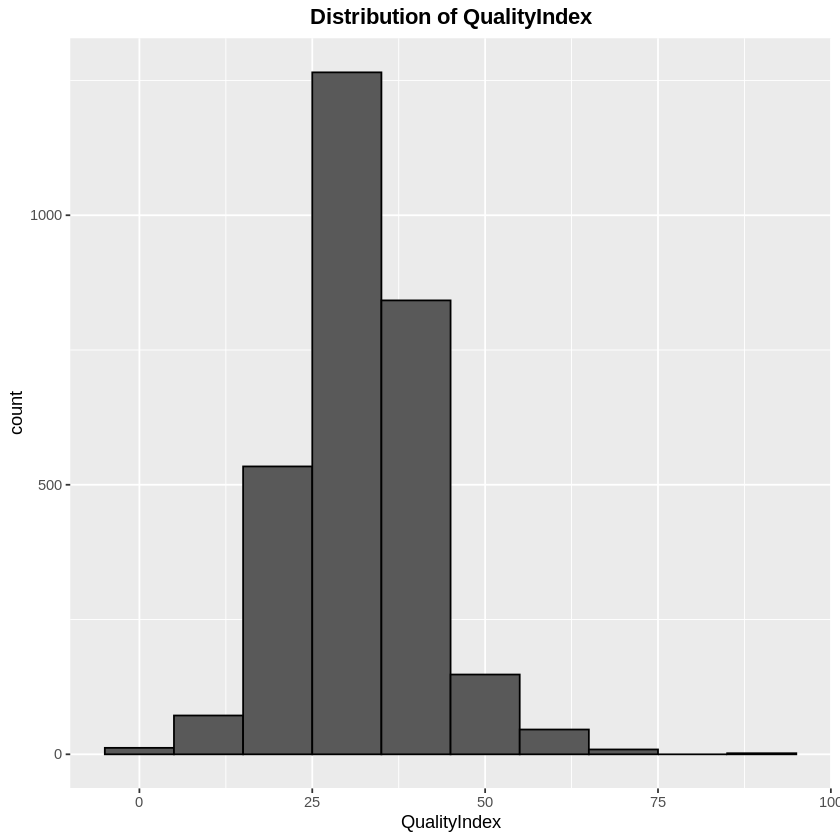

In [ ]:
require(ggplot2)
ggplot(subdat) +
  geom_bar( aes(LotShape) ) +
  ggtitle("Number of houses per Lotshape") +
  theme(plot.title=element_text(lineheight=0.8, face="bold", hjust=0.5))

ggplot(subdat, aes(x=SalePrice)) + 
  geom_histogram(color="black", binwidth= 10000) +
  labs(title="Distribution of Sale Price") +
  theme(plot.title=element_text(lineheight=0.8, face="bold", hjust=0.5))

ggplot(subdat, aes(x=TotalFloorSF)) + 
  geom_histogram(color="black", binwidth= 100) +
  labs(title="Distribution of TotalFloorSF") +
  theme(plot.title=element_text(lineheight=0.8, face="bold", hjust=0.5))

ggplot(subdat, aes(x=QualityIndex)) + 
  geom_histogram(color="black", binwidth= 10) +
  labs(title="Distribution of QualityIndex") +
  theme(plot.title=element_text(lineheight=0.8, face="bold", hjust=0.5))

#Bivariate EDA

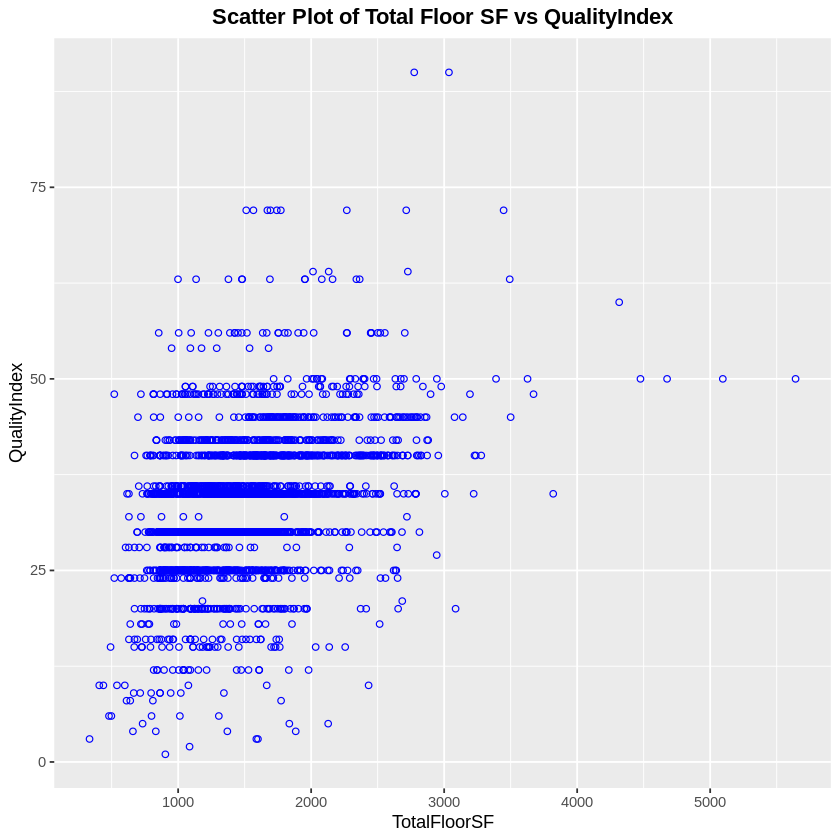

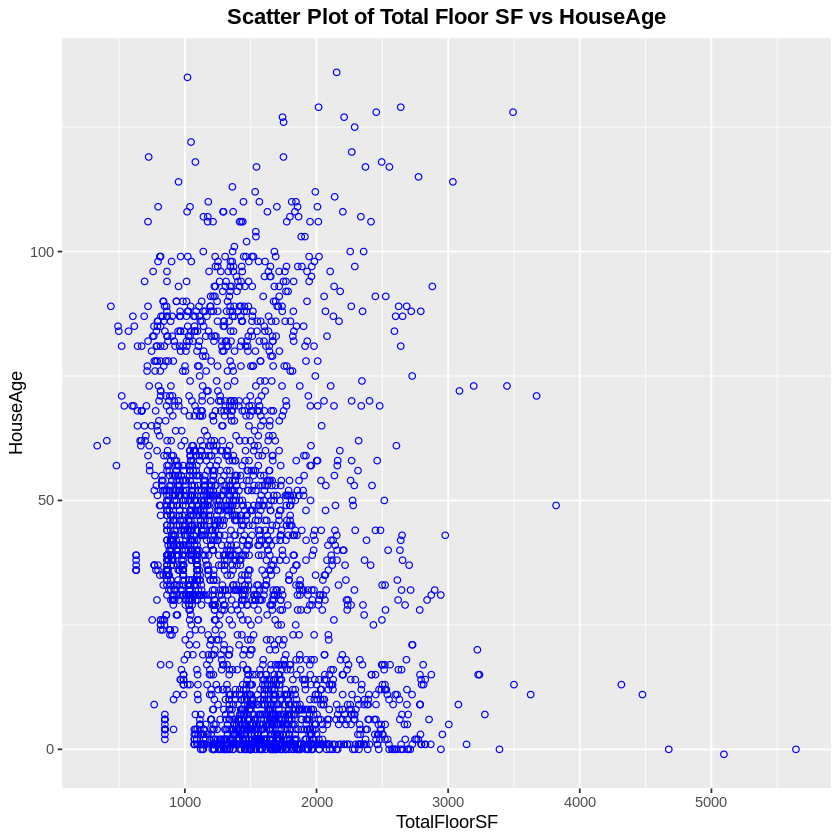

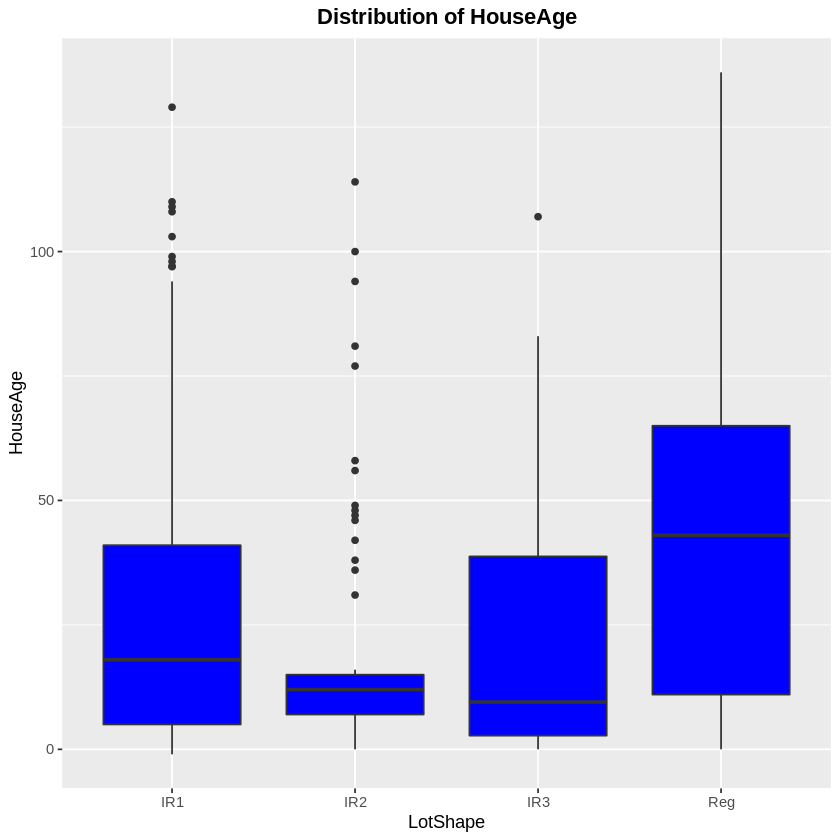

In [ ]:
ggplot(subdat, aes(x=TotalFloorSF, y=QualityIndex)) + 
  geom_point(color="blue", shape=1) +
  ggtitle("Scatter Plot of Total Floor SF vs QualityIndex") +
  theme(plot.title=element_text(lineheight=0.8, face="bold", hjust=0.5))

ggplot(subdat, aes(x=TotalFloorSF, y=HouseAge)) + 
  geom_point(color="blue", shape=1) +
  ggtitle("Scatter Plot of Total Floor SF vs HouseAge") +
  theme(plot.title=element_text(lineheight=0.8, face="bold", hjust=0.5))

ggplot(subdat, aes(x=LotShape, y=HouseAge)) + 
  geom_boxplot(fill="blue") +
  labs(title="Distribution of HouseAge") +
  theme(plot.title=element_text(lineheight=0.8, face="bold", hjust=0.5))

#Model Focused EDA

`geom_smooth()` using formula 'y ~ x'



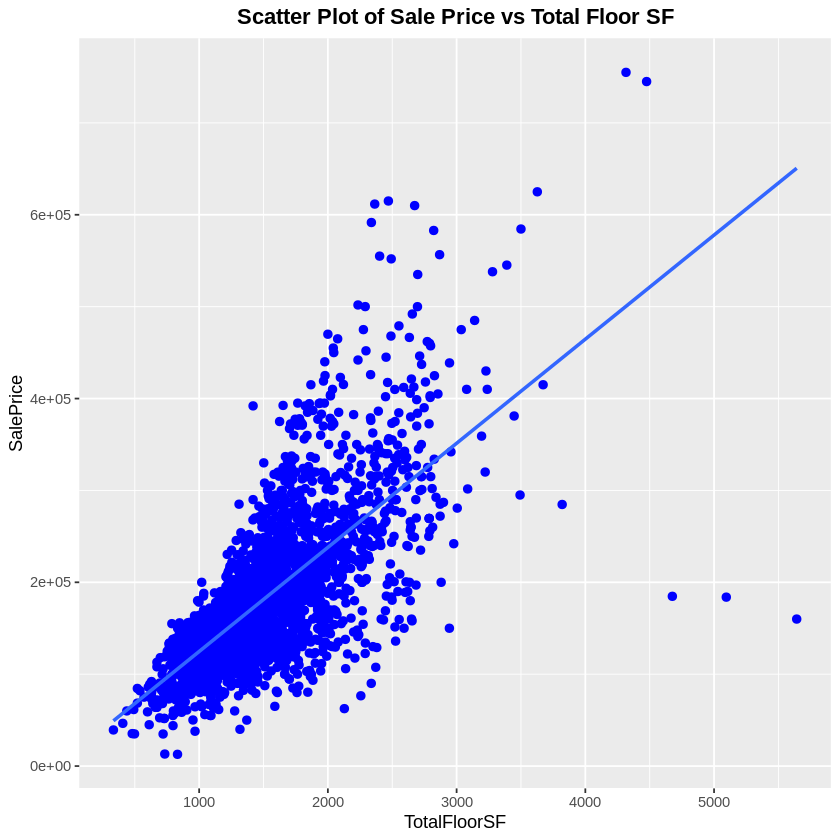

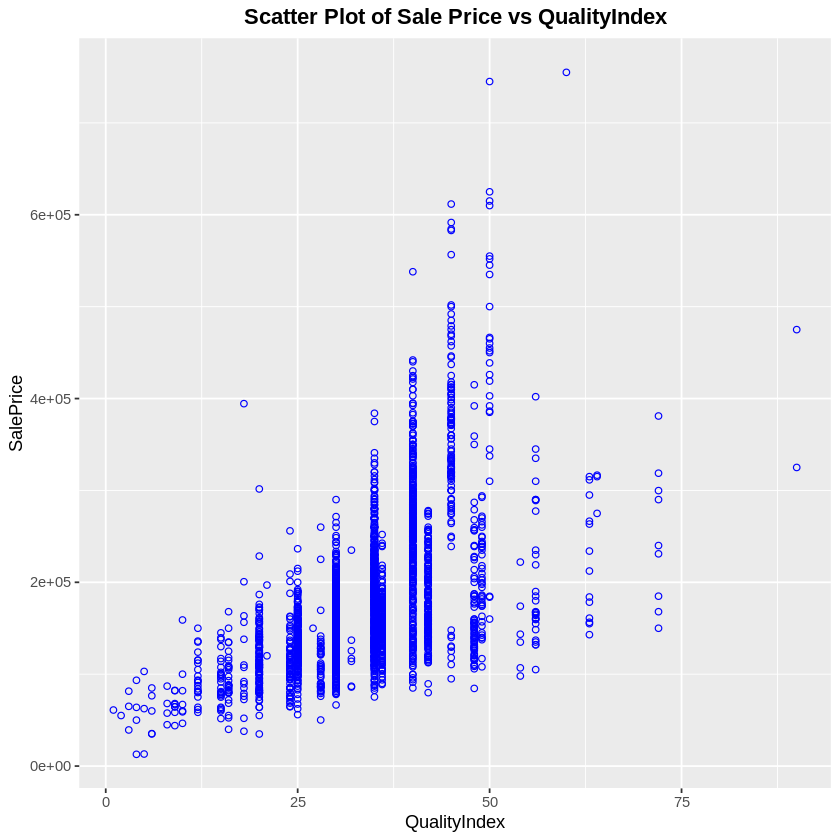

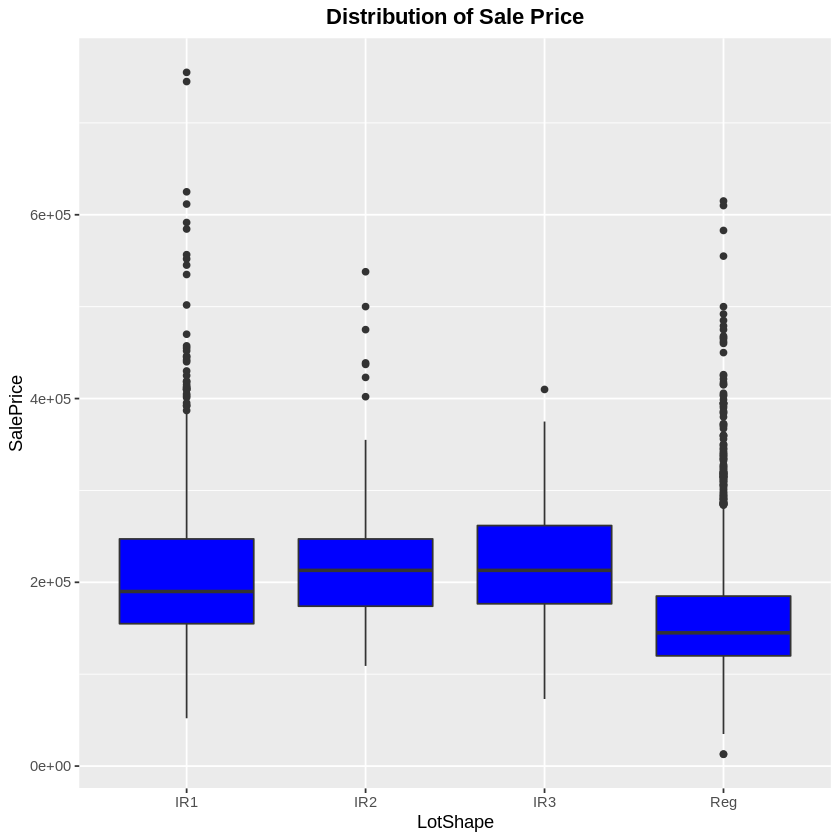

In [ ]:
ggplot(subdat, aes(x=TotalFloorSF, y=SalePrice)) + 
  geom_point(color="blue", size=2) +
  ggtitle("Scatter Plot of Sale Price vs Total Floor SF") +
  theme(plot.title=element_text(lineheight=0.8, face="bold", hjust=0.5)) +
  geom_smooth(method=lm, se=FALSE)  ## method=lm, se=FALSE ###

ggplot(subdat, aes(x=QualityIndex, y=SalePrice)) + 
  geom_point(color="blue", shape=1) +
  ggtitle("Scatter Plot of Sale Price vs QualityIndex") +
  theme(plot.title=element_text(lineheight=0.8, face="bold", hjust=0.5)) 

ggplot(subdat, aes(x=LotShape, y=SalePrice)) + 
  geom_boxplot(fill="blue") +
  labs(title="Distribution of Sale Price") +
  theme(plot.title=element_text(lineheight=0.8, face="bold", hjust=0.5))

#Multivariate EDA

ERROR while rich displaying an object: Error in farver::decode_colour(colors, alpha = TRUE, to = "lab", na_value = "transparent"): unused argument (na_value = "transparent")

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = e

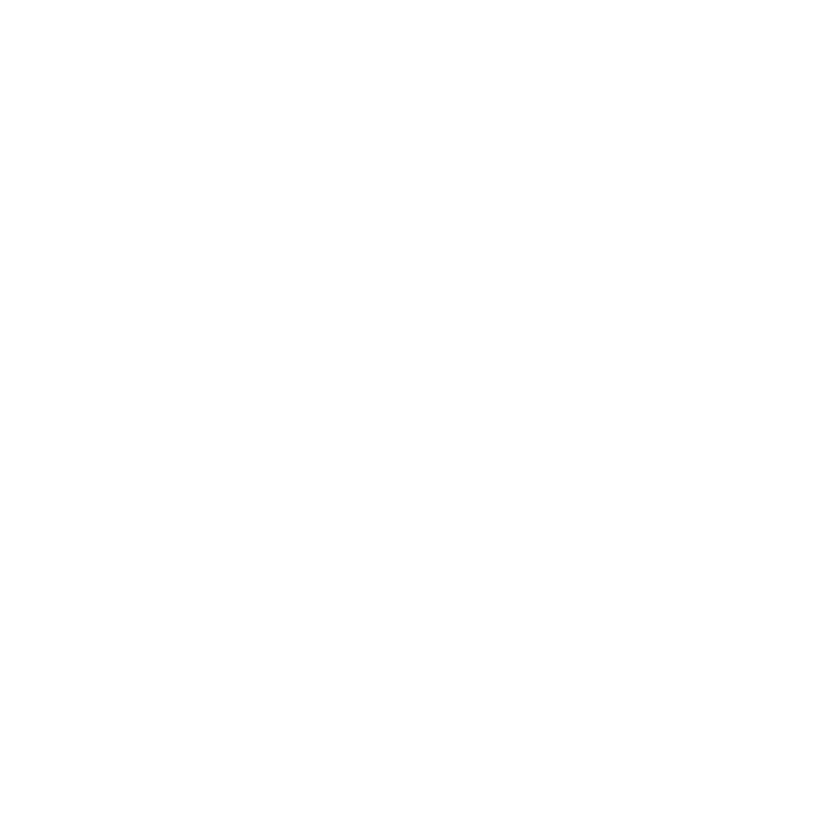

In [ ]:
require(GGally)
ggpairs(subdat, cardinality_threshold=28)

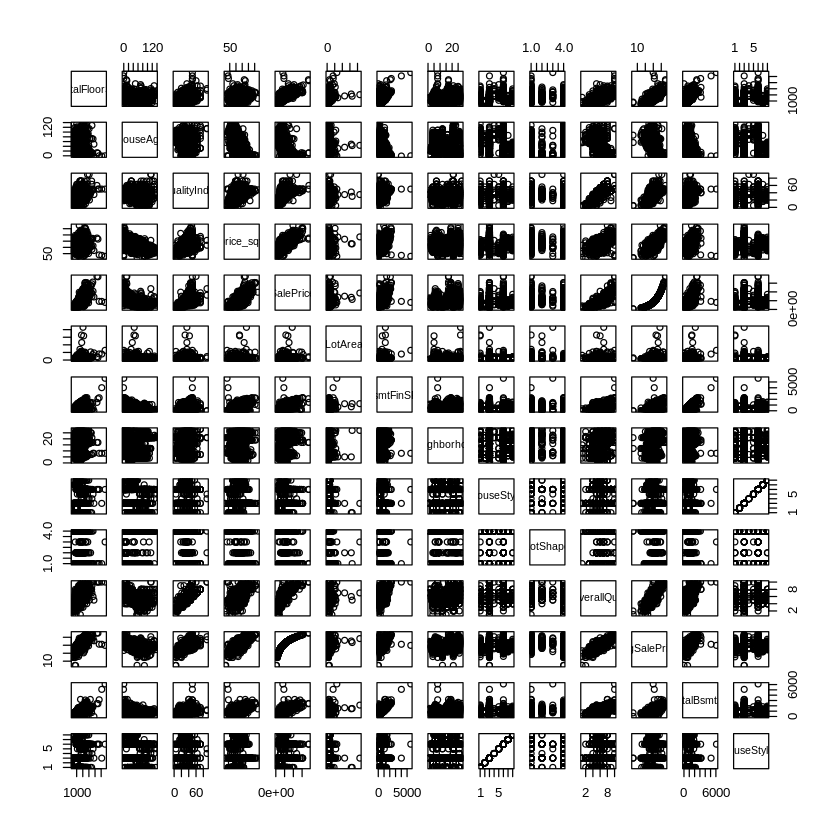

In [ ]:
require(lattice)
pairs(subdat, pch = 21)

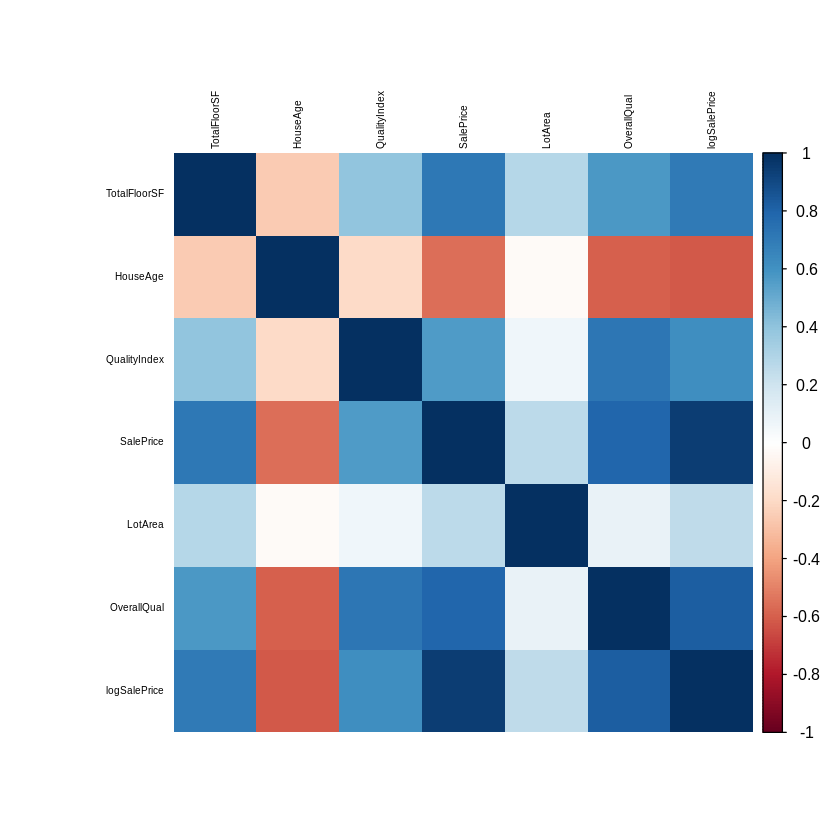

In [ ]:
require(corrplot)
mcor <- cor(subdatnum)
corrplot(mcor, method="shade", shade.col=NA, tl.col="black",tl.cex=0.5)